In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [37]:
import seaborn as sns

# Частина третя: Аналіз датасет c Kaggle.com

In [4]:
data = pd.read_csv('/home/igor8282/Desktop/Projects/DS_2/bestsellers with categories.csv')
data

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


##### Виведіть перші п'ять рядків (використовується функція head)

In [5]:
data.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


##### Виведіть розміри датасету (використовуйте атрибут shape)

In [6]:
data.shape

(550, 7)

##### Про скільки книг зберігає дані датасет?   ## відповідь: 550

In [7]:
data.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
data.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# Первинне дослідження даних

##### Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [8]:
data.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

##### Відповідь: Чи є в якихось змінних пропуски? (Так / ні) : НІ

##### Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [9]:
data['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

##### Відповідь: Які є унікальні жанри? :   Non Fiction', 'Fiction'

##### Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

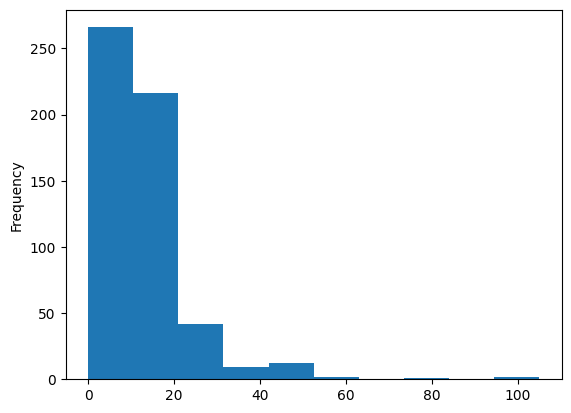

In [10]:
data['price'].plot(kind='hist')
plt.show()

##### Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [11]:
data['price'].max()    # MAX PRICE

105

In [12]:
data['price'].min()    # MIN PRICE

0

In [13]:
data['price'].mean()   # MEAN PRICE

13.1

In [14]:
data['price'].median()  # MEDIAN PRICE

11.0

# Пошук та сортування даних

##### Відповідь: Який рейтинг у датасеті найвищий? Відповідь:

In [15]:
data['user_rating'].max()

4.9

##### Відповідь: Скільки книг мають такий рейтинг? Відповідь:

In [16]:
data[data['user_rating'] == 4.9].shape[0]

52

##### Відповідь: Яка книга має найбільше відгуків? Відповідь:

In [17]:
data['name'][data['reviews'] == data['reviews'].max()]

534    Where the Crawdads Sing
Name: name, dtype: object

##### Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь:

In [18]:
data.query('year == 2015').query('price ==price.max()')['author']

277    American Psychological Association
Name: author, dtype: object

##### Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь:

In [19]:
len(data.query('genre == "Fiction" & year == 2010'))

20

##### Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь:

In [20]:
len(data.query('(year == 2010 | year == 2011) & user_rating == 4.9'))

1

##### І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

In [21]:
year_books = data.query('year == 2015 and price < 8').sort_values('price')
year_books

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


##### Відповідь: Яка книга остання у відсортованому списку? Відповідь:

In [22]:
year_books.iloc[-1]

name           Old School (Diary of a Wimpy Kid #10)
author                                   Jeff Kinney
user_rating                                      4.8
reviews                                         6169
price                                              7
year                                            2015
genre                                        Fiction
Name: 253, dtype: object

# Агрегування даних та з'єднання таблиць

##### Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [23]:
data.groupby('genre')['price'].agg(['min', 'max'])

,min,max
genre,,
Fiction,0,82
Non Fiction,0,105


##### Відповідь: Максимальна ціна для жанру Fiction: Відповідь:   82

##### Відповідь: Мінімальна ціна для жанру Fiction: Відповідь : 0

##### Відповідь: Максимальна ціна для жанру Non Fiction: Відповідь: 105

##### Відповідь: Мінімальна ціна для жанру Non Fiction: Відповідь: 0

##### Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [24]:
author_count = data.groupby('author')['name'].agg(['count'])
author_count

,count
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2
William P. Young,2


##### Відповідь: Якої розмірності вийшла таблиця? Відповідь:

In [25]:
author_count.shape

(248, 1)

##### Відповідь: Який автор має найбільше книг? Відповідь:

In [26]:
author_count.query('count == count.max()').index[0]

'Jeff Kinney'

##### Відповідь: Скільки книг цього автора? Відповідь:

In [27]:
author_count.query('count == count.max()')['count']

author
Jeff Kinney    12
Name: count, dtype: int64

##### Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [28]:
mean_rate = data.groupby('author')['user_rating'].agg(['mean'])


##### Відповідь: У якого автора середній рейтинг мінімальний? Відповідь:

In [29]:
mean_rate.query('mean == mean.min()').index[0]

'Donna Tartt'

##### Відповідь: Який у цього автора середній рейтинг? Відповідь:

In [30]:
mean_rate.query('mean == mean.min()').values[0]

array([3.9])

##### З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [31]:
concat = pd.concat([mean_rate, author_count], axis=1)
concat

,mean,count
author,,
Abraham Verghese,4.600000,2
Adam Gasiewski,4.400000,1
Adam Mansbach,4.800000,1
Adir Levy,4.800000,1
Admiral William H. McRaven,4.700000,1
...,...,...
Walter Isaacson,4.566667,3
William Davis,4.400000,2
William P. Young,4.600000,2


##### Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [32]:
concat = concat.sort_values(['count', 'mean'])
concat

,mean,count
author,,
Muriel Barbery,4.000000,1
Chris Cleave,4.100000,1
Ian K. Smith M.D.,4.100000,1
Pierre Dukan,4.100000,1
Elizabeth Strout,4.200000,1
...,...,...
American Psychological Association,4.500000,10
Suzanne Collins,4.663636,11
Gary Chapman,4.736364,11


##### Відповідь: Який автор перший у списку?

In [33]:
concat.index[0]

'Muriel Barbery'

# Візуалізація

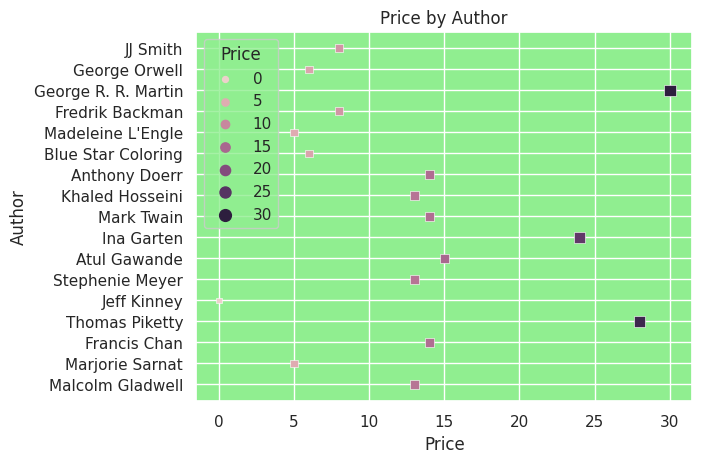

In [44]:
data = pd.read_csv('/home/igor8282/Desktop/Projects/DS_2/bestsellers with categories.csv')
science = data[['Author', 'Price']].drop_duplicates()[:50:3]
sns.set_style('whitegrid')
sns.set (rc={'axes.facecolor':'lightgreen'})
sns.scatterplot(data=science, y=science['Author'], x=science['Price'], hue='Price', size='Price', marker='s').set(title=\
'Price by Author')
plt.show()

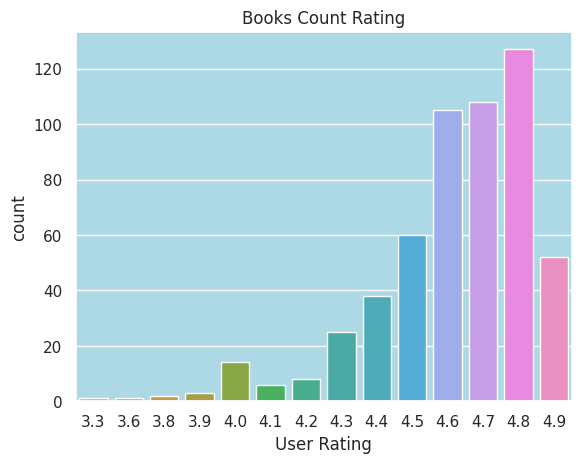

In [39]:
data = pd.read_csv('/home/igor8282/Desktop/Projects/DS_2/bestsellers with categories.csv')
sns.set (rc={'axes.facecolor':'lightblue'})
sns.countplot(data=data, x='User Rating').set(title='Books Count Rating')
plt.show()

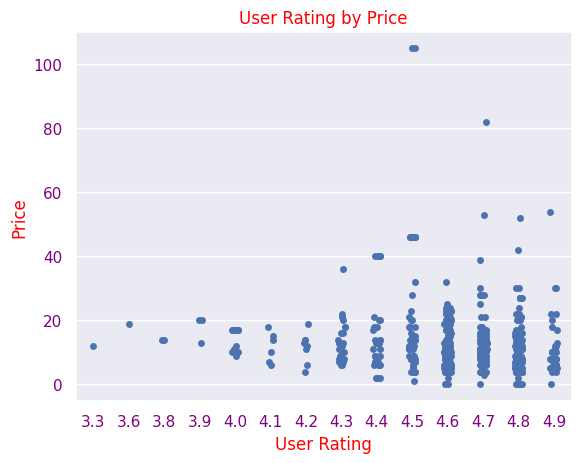

In [46]:
sns.set_style(style='darkgrid', rc={'text.color': 'red', 'xtick.color': 'purple',
 'ytick.color': 'purple', 'axes.labelcolor': 'red'})
sns.stripplot(data=data, y='Price', x='User Rating').set(title='User Rating by Price')
plt.show()